# Customer Interaction Strategy - Model Fitness

# Content <a id='back'></a>

* [1) Project Objective](#projectgoal)
* [2) Exploratory Data Analysis](#data_preprocessing)
* [3) Predict Model to Customer Churn](#predictmodel)
* [4) Customer Segmentation](#customersegmentation)
* [5) Conclusion and Recommendations](#endandrecommmendations)

## Project Objective

The goal of the project is to analyze customer profiles from Model Fitness, a gym chain, to identify patterns that lead to customer churn (attrition) and develop a data-driven customer retention strategy. By examining various factors such as contract length, frequency of visits, proximity to the gym, and participation in promotional offers, the aim is to understand why customers stop using the service and how to prevent them from leaving. The ultimate objective is to reduce churn and improve customer loyalty through strategic interventions based on data insights.

## Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
import datetime as dt

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [5]:
print(gym.isna().sum()) #calculando o número de valores ausentes de logs_df
print()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64



We don't have any missing data in the dataframe.

In [6]:
print(gym.duplicated().sum()) #Contando duplicados explícitos de logs_df
print()

0



We also don't have any duplicate values. 

In [7]:
statistics = gym.describe() # gerar estatísticas descritivas

print(statistics)


            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

Here is a summary of the descriptive statistics (mean and standard deviation) for the key variables:

* Gender: Mean = 0.51, Standard Deviation = 0.50
* Near_Location: Mean = 0.85, Standard Deviation = 0.36
* Contract_period: Mean = 4.68 months, Standard Deviation = 4.55
* Age: Mean = 29.18 years, Standard Deviation = 3.26
* Avg_additional_charges_total: Mean = 146.94, Standard Deviation = 96.36
* Avg_class_frequency_total: Mean = 1.88, Standard Deviation = 0.97
* Churn: Mean = 0.27, Standard Deviation = 0.44 (indicates that approximately 26.5% of customers left the gym)

These values give us a general idea of the customer profiles. The next step is to analyze correlations or visualize the data to identify patterns related to churn.

In [8]:
grouped_means = gym.groupby('Churn').mean() # Calcular as médias das características para os dois grupos: clientes que ficaram (Churn = 0) e que saíram (Churn = 1)
print(grouped_means)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Based on the grouped means for customers who stayed (Churn = 0) and those who left (Churn = 1), here are some key differences:

* Near_Location: Customers who stayed had a slightly higher proximity to the gym (0.87) compared to those who left (0.77).
* Partner: A higher percentage of customers who stayed had a partner (53%) compared to those who left (35%).
* Promo_friends: 35% of those who stayed joined with a promotion involving friends, while only 18% of those who churned did.
* Contract_period: Those who stayed had longer contract periods (5.75 months) versus those who left (1.73 months).
* Age: Customers who stayed were older on average (29.98 years) compared to those who churned (26.99 years).
* Avg_additional_charges_total: Customers who stayed spent more on additional charges (158.45) compared to those who left (115.08).
* Lifetime: The total time spent at the gym was higher for customers who stayed (4.71 months) versus those who churned (0.99 months).
* Avg_class_frequency_total: Those who stayed attended classes more frequently (2.02) compared to those who left (1.47).
* Avg_class_frequency_current_month: In the most recent month, customers who stayed had a higher class frequency (2.03) compared to those who churned (1.04).
* These differences suggest that factors like longer contracts, older age, proximity to the gym, and higher engagement (e.g., with classes and promotions) are associated with retention.

This script below will generate stacked histograms (for comparison) with Kernel Density Estimation (KDE) curves for each feature, split by churn status (0 = stayed, 1 = left).

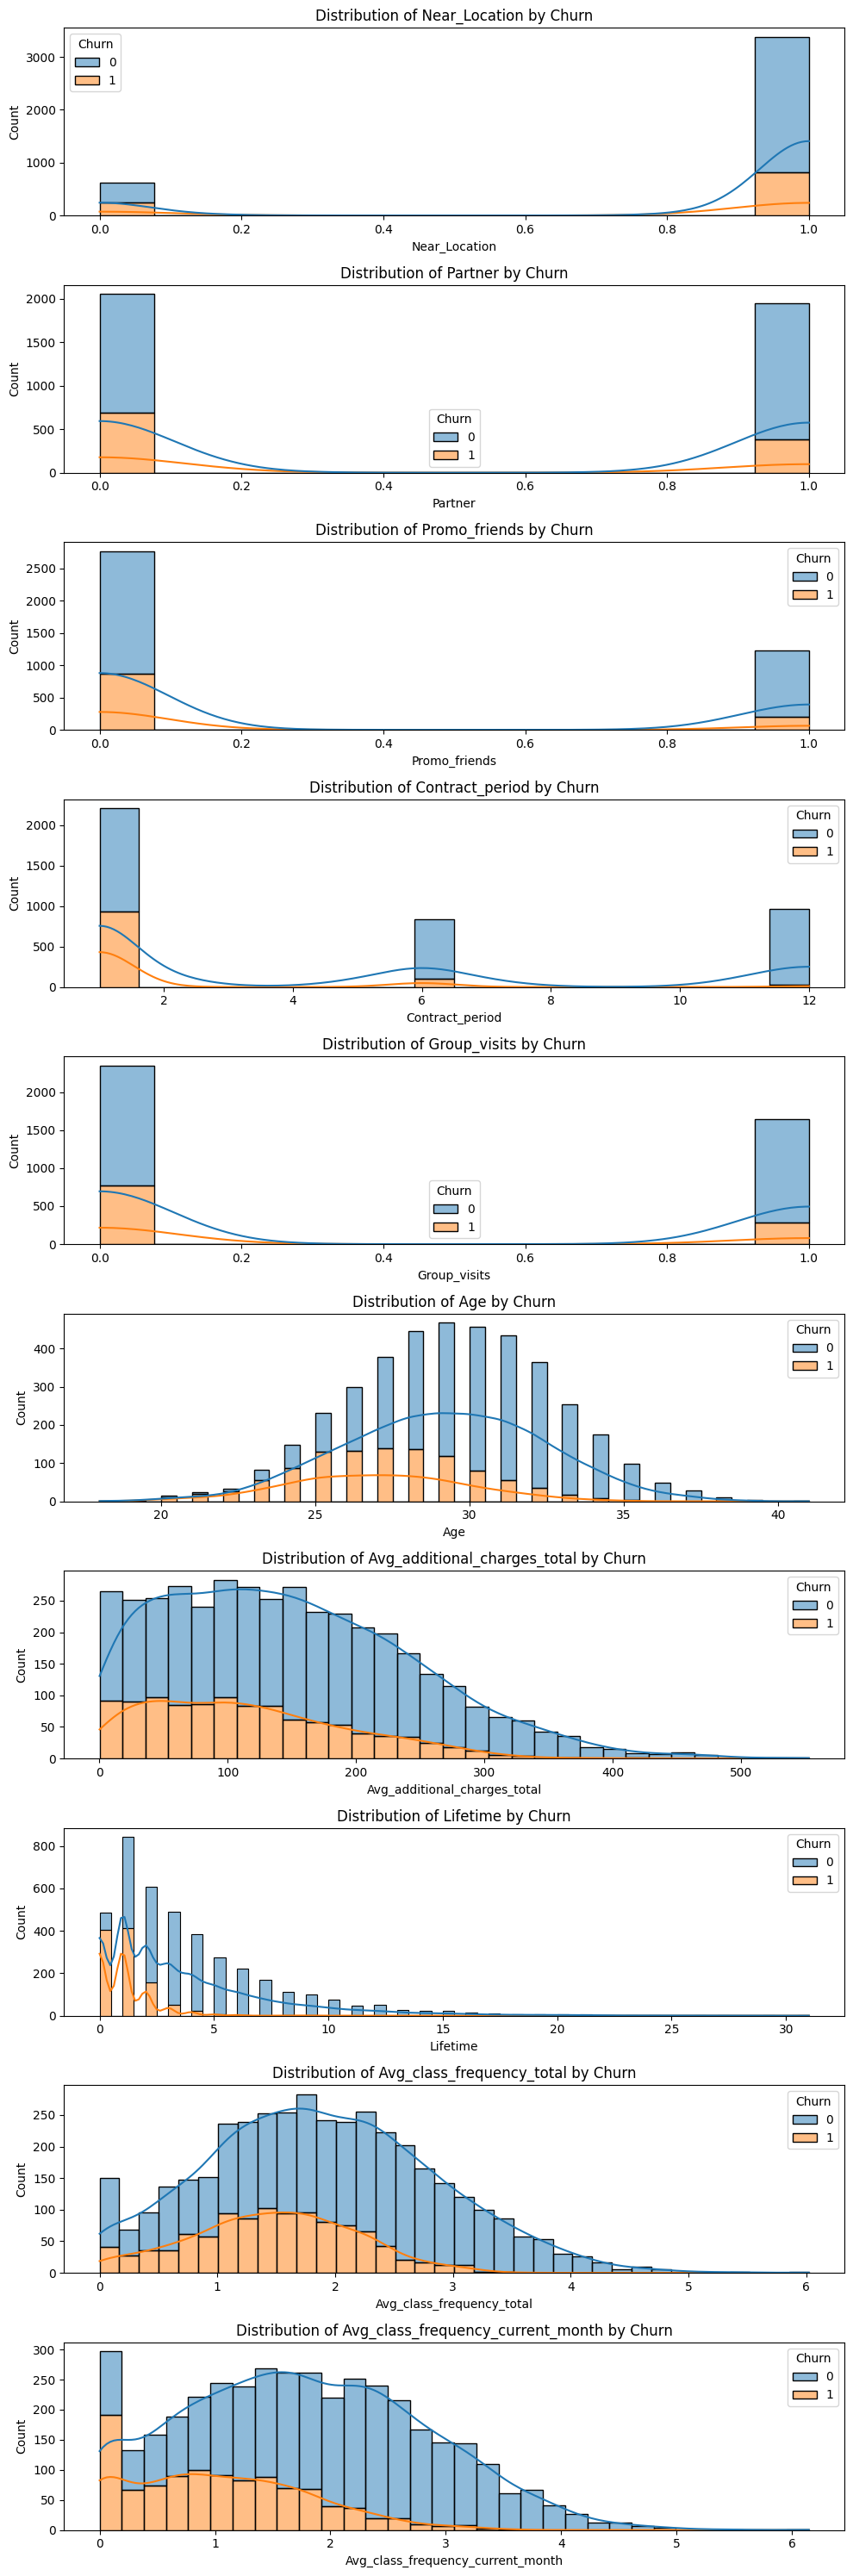

In [9]:
# Define the features of interest
features = ['Near_Location', 'Partner', 'Promo_friends', 'Contract_period', 
            'Group_visits', 'Age', 'Avg_additional_charges_total', 
            'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Set up the figure and axes
fig, axes = plt.subplots(len(features), 1, figsize=(10, 30))

# Loop through the features and plot distributions
for i, feature in enumerate(features):
    sns.histplot(data=gym, x=feature, hue='Churn', multiple='stack', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature} by Churn')

plt.tight_layout()
plt.show()

The histograms show several important trends between customers who stayed and those who churned:

* Near_Location: A higher proportion of customers who live near the gym stayed, whereas those further away were more likely to churn.

* Partner: Having a partner is linked to higher retention. Customers without a partner were more likely to churn.

* Promo_friends: Customers who joined due to a friends' promotion were more likely to stay, while those who didn't participate in promotions were more likely to leave.

* Contract_period: Short contract periods are associated with churn. Customers with longer contracts tended to stay longer.

* Group_visits: Regular participation in group visits is linked to retention. Customers who didn’t attend group visits were more likely to leave.

* Age: Older customers (around 30) are more likely to stay, while younger customers were more likely to churn.

* Avg_additional_charges_total: Customers who spent more on additional services (e.g., personal training, etc.) were more likely to stay.

* Lifetime: Customers with a longer gym tenure (lifetime) were significantly more likely to stay, while those with shorter tenures churned.

* Avg_class_frequency_total and Avg_class_frequency_current_month: Higher class frequency correlates with retention, with those attending more classes showing lower churn rates.

These patterns suggest that longer engagement, social incentives (partners or friends), and higher participation in services and classes are key factors in reducing churn.

In [10]:
# Construct and display the correlation matrix
correlation_matrix = gym.corr()

print(correlation_matrix)

                                     gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.04

Here’s a summary of the key insights from the correlation matrix:

1. Churn Correlations:

* Lifetime has the strongest negative correlation with churn (-0.44). This indicates that the longer a customer has been with the gym, the less likely they are to churn.
* Avg_class_frequency_current_month (-0.41) and Avg_class_frequency_total (-0.25) are also negatively correlated, meaning that more frequent class attendance reduces churn.
* Age (-0.40) and Contract_period (-0.39) also show strong negative correlations, indicating that older clients and those with longer contracts are less likely to churn.

2. Month_to_end_contract and Contract_period are highly correlated (0.97), which makes sense since the length of the contract impacts the remaining time.

3. Promo_friends and Partner show relatively moderate positive correlations with one another (0.45), suggesting a link between joining the gym with a friend or partner.

4. Near_Location has a mild negative correlation with churn (-0.13), indicating that being close to the gym somewhat reduces the chance of churn.

Overall, factors such as longer tenure, frequent attendance, and having longer contracts are the most significant in reducing churn.

## Predict Model to Customer Churn

To predict customer churn, we can build a predictive model using machine learning.
    
- Data Split: The dataset is split into 70% for training and 30% for validation.
- Data Scaling: Only Logistic Regression needs scaled data. Random Forest works well without scaling.
- Training: Two models are trained: Logistic Regression and Random Forest.
- Evaluation: Accuracy, precision and sensitivity metrics are calculated for both models, allowing a performance comparison.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report

In [12]:
X = gym.drop('Churn', axis=1)  # Features
y = gym['Churn']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predictions for both models
y_pred_log = log_reg.predict(X_val_scaled)
y_pred_rf = rf_clf.predict(X_val_scaled)

# Evaluate Logistic Regression
accuracy_log = accuracy_score(y_val, y_pred_log)
precision_log = classification_report(y_val, y_pred_log, output_dict=True)['1']['precision']
recall_log = classification_report(y_val, y_pred_log, output_dict=True)['1']['recall']

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = classification_report(y_val, y_pred_rf, output_dict=True)['1']['precision']
recall_rf = classification_report(y_val, y_pred_rf, output_dict=True)['1']['recall']

# Print the results
print("Logistic Regression - Accuracy: ", accuracy_log)
print("Logistic Regression - Precision: ", precision_log)
print("Logistic Regression - Recall: ", recall_log)

print("Random Forest - Accuracy: ", accuracy_rf)
print("Random Forest - Precision: ", precision_rf)
print("Random Forest - Recall: ", recall_rf)

Logistic Regression - Accuracy:  0.925
Logistic Regression - Precision:  0.8763250883392226
Logistic Regression - Recall:  0.8184818481848185
Random Forest - Accuracy:  0.9141666666666667
Random Forest - Precision:  0.8623188405797102
Random Forest - Recall:  0.7854785478547854


- Accuracy: Logistic Regression has a slightly higher accuracy (92.5%) compared to Random Forest (91.42%).

- Precision: Logistic Regression also has a higher precision (87.63%) than Random Forest (86.23%), meaning it makes fewer false positive predictions.

- Recall: Logistic Regression outperforms Random Forest in recall as well (81.85% vs. 78.55%), indicating it identifies a larger proportion of churned customers correctly.

Based on these metrics, Logistic Regression provides better results overall, particularly in identifying churned customers more accurately with a higher recall and precision. Therefore, it might be the preferred model for predicting customer churn in this scenario.

## Customer Segmentation

   Customer segmentation is the process of dividing a customer base into distinct groups of individuals that share similar characteristics. These segments allow businesses to target marketing strategies more effectively by addressing the unique needs of different groups.

To begin the clustering process and create customer segments with churn data, we will follow these steps:
    
1. Standardizing the Data:
Before performing clustering, the data must be standardized (mean = 0, standard deviation = 1). This ensures that all features contribute equally to the distance calculations.


2. Using linkage() for Hierarchical Clustering:
Hierarchical clustering groups customers based on the standardized feature matrix, using the linkage() function. This will compute a matrix of distances based on a chosen metric (usually Euclidean).


3. Building the Dendrogram:
The dendrogram is a graphical representation of the hierarchical clustering, showing how clusters are merged step by step. From the dendrogram, we can visually estimate the optimal number of clusters to use for segmentation.


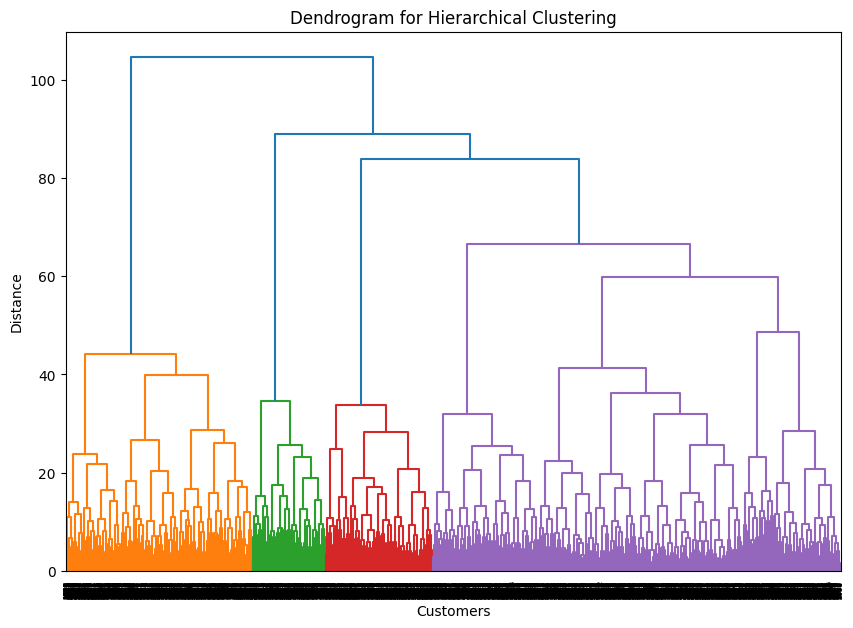

In [13]:
# Standardizing the features
scaler = StandardScaler()
gym_standardized = scaler.fit_transform(gym.drop(columns=['Churn']))  # Exclude 'Churn' column for now

# Perform hierarchical clustering using linkage
Z = linkage(gym_standardized, method='ward')  # 'ward' minimizes the variance of clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(Z)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

We can observe that the dendrogram suggests a natural division into 4 or 5 main clusters. You can see this by finding the largest vertical distances between merges (the longest branches) and drawing a horizontal line that cuts the tree at those points.

The color-coded clusters at the bottom suggest there are clusters of different sizes. The orange, green, red, and purple clusters are clear candidates for separate customer groups.These clusters could represent different customer behaviors or segments in terms of churn risk, usage patterns, or demographics.

In [14]:
# Selecting the features to cluster (excluding 'Churn' as it's the target, not a feature)
features = gym.drop(columns=['Churn'])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Defining the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the KMeans model to the standardized data
kmeans.fit(X_scaled)

# Predicting the clusters
clusters = kmeans.predict(X_scaled)

# Adding the cluster predictions to the original DataFrame
gym['Cluster'] = clusters

# Display the first few rows of the DataFrame with cluster assignments
gym[['Cluster']].head()

,Cluster
0,4
1,2
2,3
3,2
4,0


Based on the K-means clustering result, we have identified 5 clusters (numbered 0 to 4). Here's the distribution of the data points in each cluster:

Cluster 0: Most customers belong to this cluster (it's labeled "Cluster 0").

Cluster 2 and Cluster 3: These are similar in size but are separate groups.

Cluster 4: This is another group of customers.



*Cluster 0: Likely the largest segment of customers, which could indicate a dominant group based on certain shared features like age, membership duration, or average charges.

*Cluster 2 & 3: These two clusters might indicate specific subgroups of customers that share some distinct characteristics, potentially showing different behaviors in churn or spending patterns.

*Cluster 4: This group is the smallest and might represent a unique segment, possibly customers with either very specific usage patterns or demographic traits.

Now, let's the analysis step by step based on the clusters:

1. Look at the average values of features for each cluster:
We will calculate the average of each feature within each cluster to understand if certain characteristics stand out or define specific groups. This can highlight differences in customer behavior or demographics between clusters.

2. Plot feature distributions for the clusters:
By plotting the distributions of key features (like contract period, age, additional charges, etc.) for each cluster, we can observe how different clusters behave. These plots will show if any cluster has distinct behaviors compared to others, such as spending more or less, or attending more classes.

3. Calculate the churn rate for each cluster:
Using groupby() on the churn status for each cluster, we will compute the churn rate for every cluster. This will help us identify which clusters have the highest churn rates (i.e., are likely to leave) and which are the most loyal.

In [19]:
# Calculating the average values of features for each cluster, 
# the churn rate for each cluster, and analyzing the cluster characteristics.

# Calculate average values of features for each cluster
cluster_means = gym.groupby('Cluster').mean()

# Calculate churn rate for each cluster
churn_rate_per_cluster = gym.groupby('Cluster')['Churn'].mean()

print(cluster_means)
print(churn_rate_per_cluster)

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

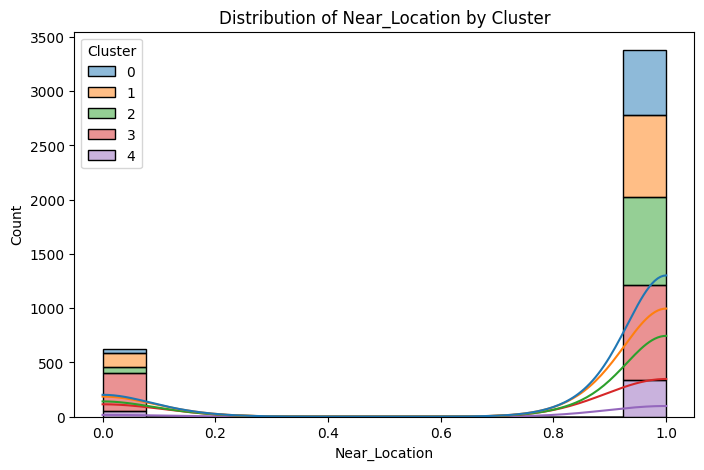

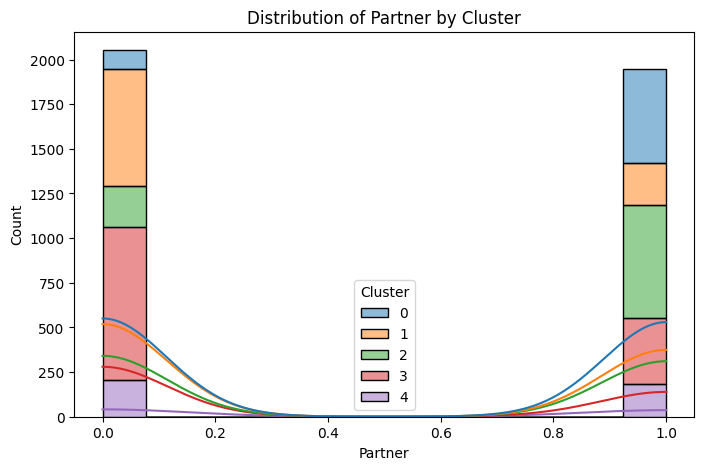

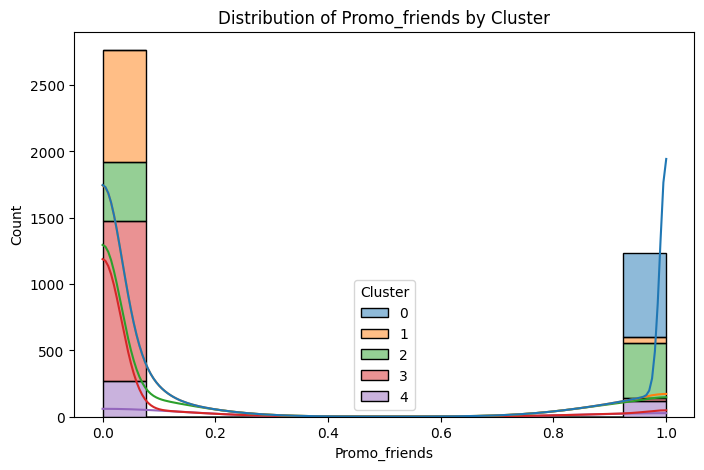

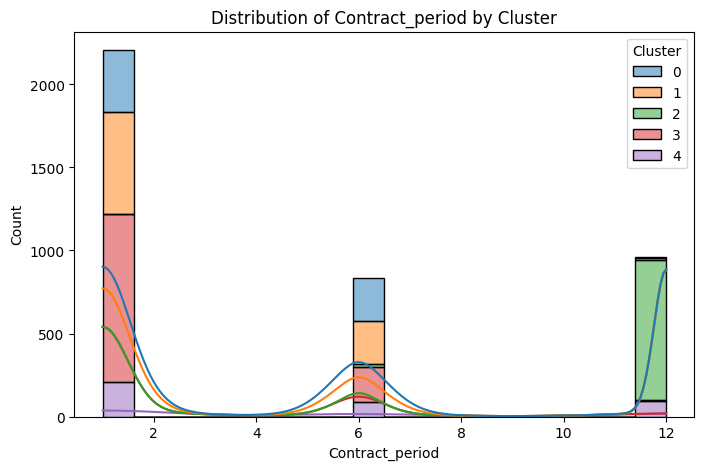

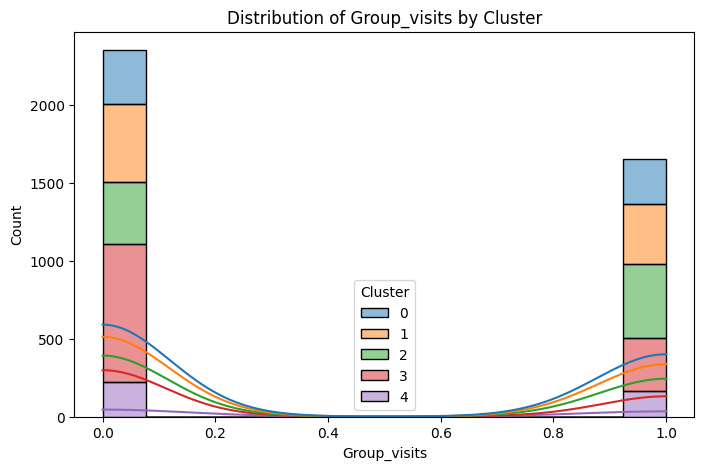

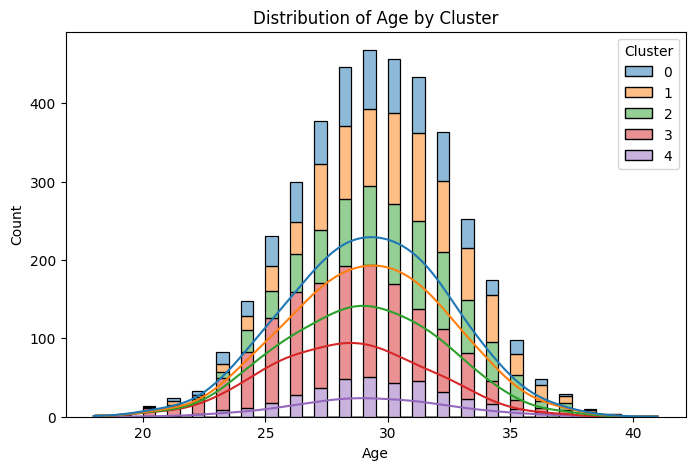

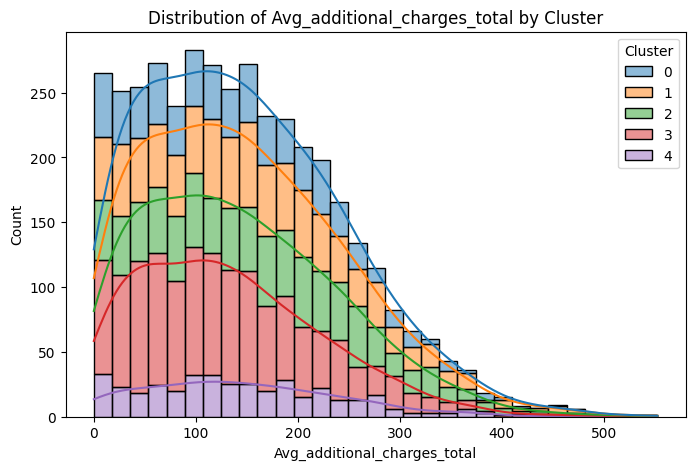

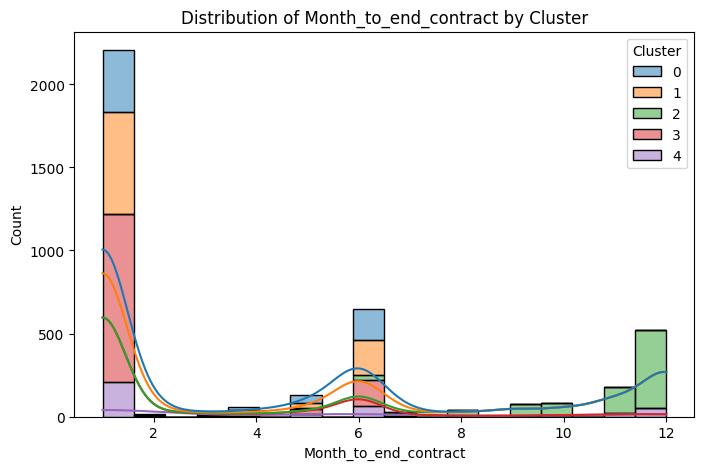

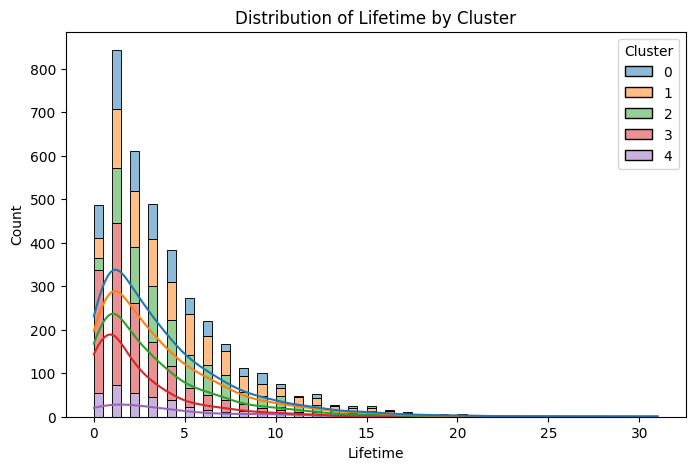

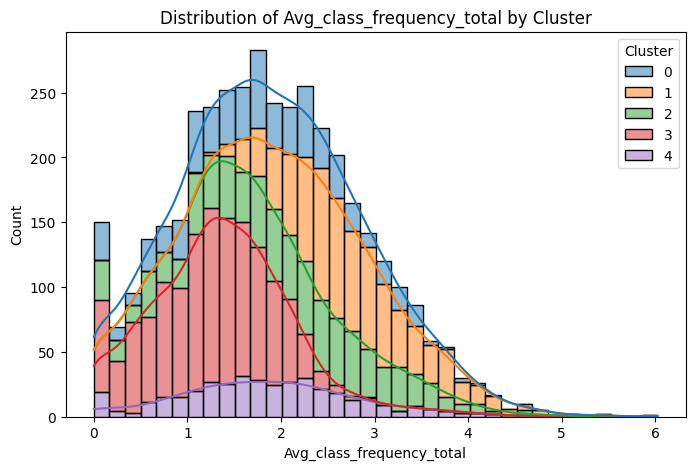

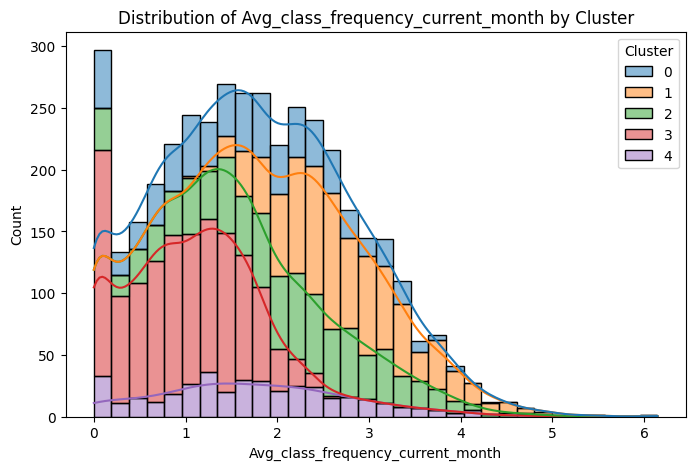

In [16]:
# Plot distributions of features for each cluster

features = ['Near_Location', 'Partner', 'Promo_friends', 'Contract_period', 
            'Group_visits', 'Age', 'Avg_additional_charges_total', 
            'Month_to_end_contract', 'Lifetime', 
            'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=gym, x=feature, hue='Cluster', multiple="stack", kde=True, palette="tab10")
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

In [17]:
# Calculate churn rate per cluster
churn_rate_per_cluster = gym.groupby('Cluster')['Churn'].mean() * 100

# Display the churn rates for each cluster
print(churn_rate_per_cluster)

Cluster
0    24.644550
1     8.998875
2     2.196532
3    57.294214
4    26.683938
Name: Churn, dtype: float64


Cluster 2 and Cluster 1 are the most loyal groups with the lowest churn rates. These clusters might represent customers who are satisfied with the gym services, are more engaged, or have contracts that encourage long-term retention.

Cluster 3 stands out with the highest churn rate (57.29%), indicating that this group requires immediate attention. A deeper dive into their behaviors, preferences, and reasons for leaving would be crucial for implementing effective retention strategies.

Clusters 0 and 4 show moderate churn rates, suggesting that they are not as loyal as Cluster 1 and 2 but still don't churn as heavily as Cluster 3.

## Conclusion and Recommendations

   For Conclusions and Recommendations for the Customer Interaction and Retention Strategy we will work with some essential principles.

1) Segmentation and Personalization:
Customers belong to different segments with distinct characteristics and churn rates, as seen in the low-churn Cluster 2 and high-churn Cluster 3. Tailored marketing strategies should be developed for each segment. For example, loyal customers in Cluster 2 can be rewarded with loyalty incentives or referral bonuses, while Cluster 3 (high churn) requires focused retention efforts, such as exclusive offers and more frequent follow-ups to address potential dissatisfaction.


2) Focus on High-Churn Groups:
With a churn rate of 57.29%, Cluster 3 shows clear issues that need attention. Conduct satisfaction surveys with this group to understand why they leave, and implement specific solutions such as additional staff training and contract reviews to make terms more appealing or flexible.


3) Proactive Engagement:
Moderate churn clusters like 0 and 4 may not yet be fully dissatisfied but could be at risk of leaving. Proactive engagement strategies, such as regular check-ins and promotions, can help keep them active. Offering frequency rewards programs or temporary discounts on services like personal training can increase their participation and engagement with the gym.


4) Retention and Communication Programs:
Retention is most effective when customers feel ongoing value. Cluster 2, with its loyal members, can serve as a success model. Establish a data-driven retention program with regular, personalized communications, such as fitness goal reminders and exclusive offers. Utilize email, SMS, and social media to keep customers informed about new services, events, and personal development opportunities.


These recommendations focus on segmentation, personalization, and proactive engagement, which are crucial to maintaining customer satisfaction and reducing churn.